In [ ]:
CASE DE VENDAS


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
df = pd.read_csv(r"C:\Users\renet\Downloads\treinamentos_ia 5\resumo_vendas.csv")
df

,ds,y
0,8/28/2025,404.52
1,8/28/2025,975.68
2,8/28/2025,169.47
3,8/28/2025,5783.64
4,8/28/2025,83.81
...,...,...
27346,1/6/2021,222.11
27347,1/6/2021,45134.00
27348,1/6/2021,689.44
27349,1/6/2021,47701.01


In [5]:
df['ds'] = pd.to_datetime(df['ds'])
df_grouped = df.groupby(df['ds'].dt.to_period('M'))['y'].sum().reset_index()
df_grouped['ds'] = df_grouped['ds'].dt.to_timestamp()

In [6]:
print(df_grouped.head())

          ds            y
0 2021-01-01   3632707.42
1 2021-02-01  12812183.31
2 2021-03-01  21306031.44
3 2021-04-01   2329599.24
4 2021-05-01   9424709.03


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_grouped = df_grouped.set_index('ds')



In [14]:
result = seasonal_decompose(df_grouped['y'], model='multiplicative', period=12)


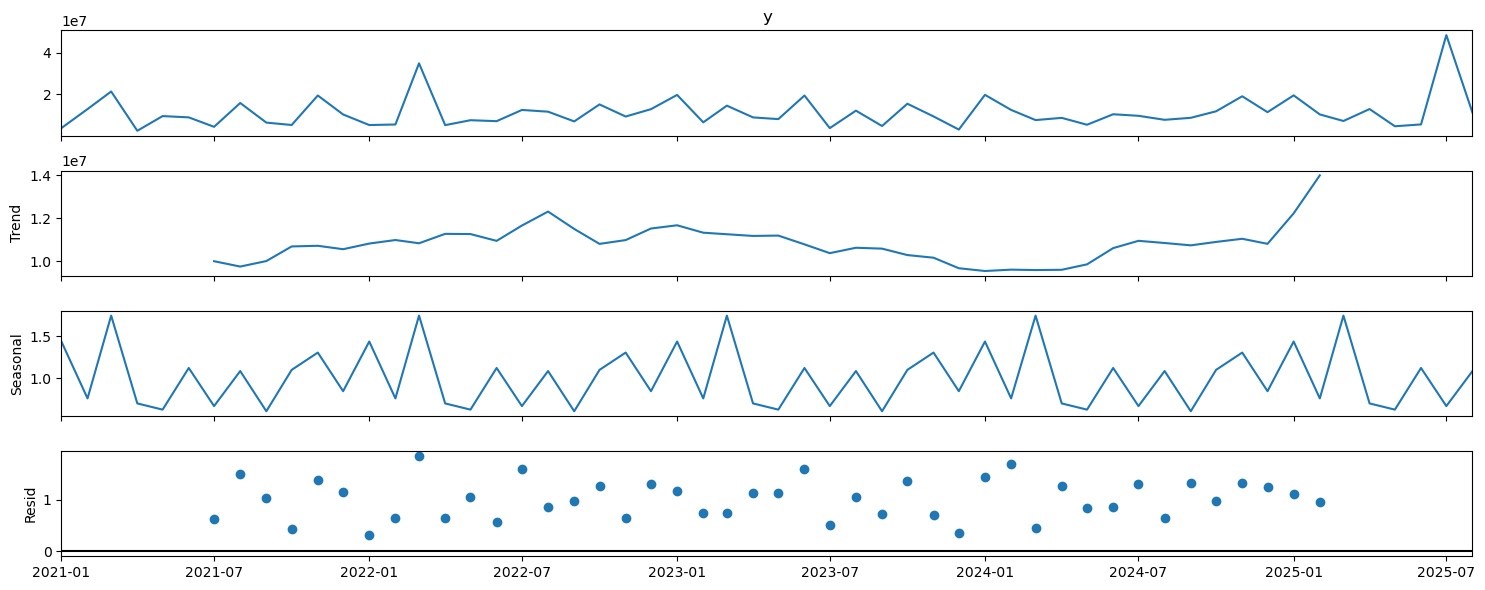

In [15]:
result.plot()


C:\Users\renet\AppData\Local\Temp\ipykernel_14924\3139721129.py:2: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(df_grouped)


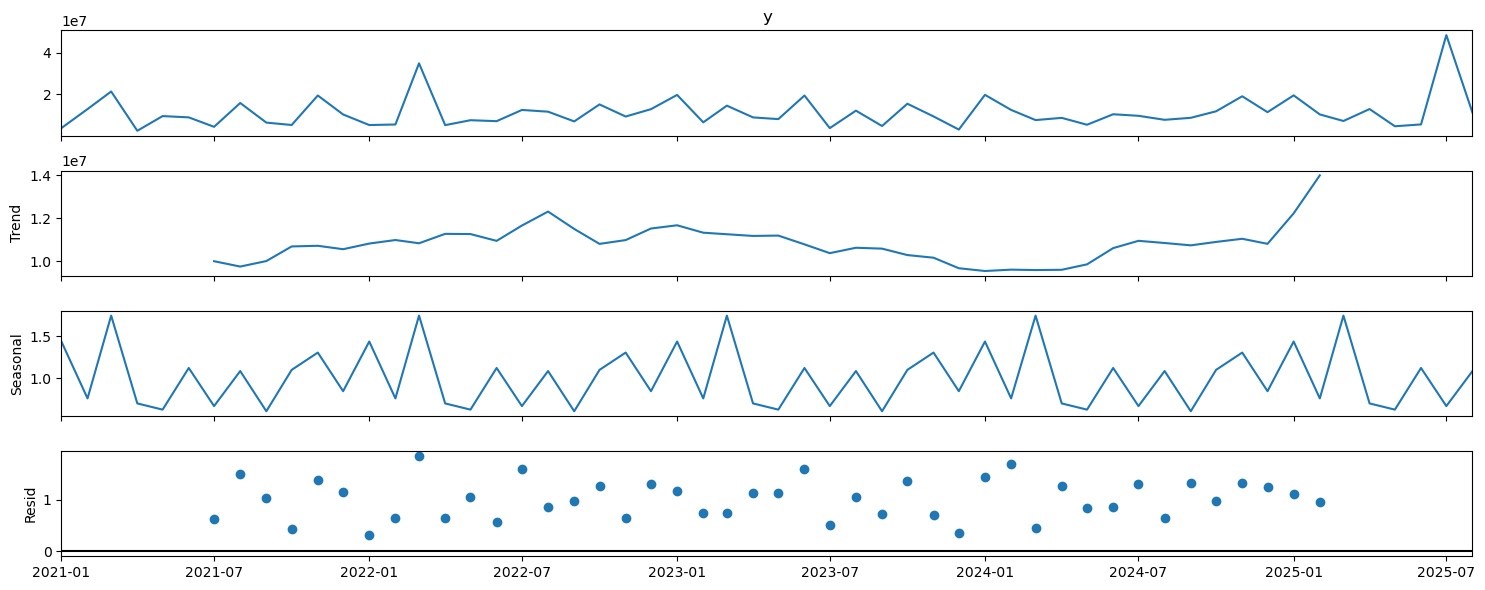

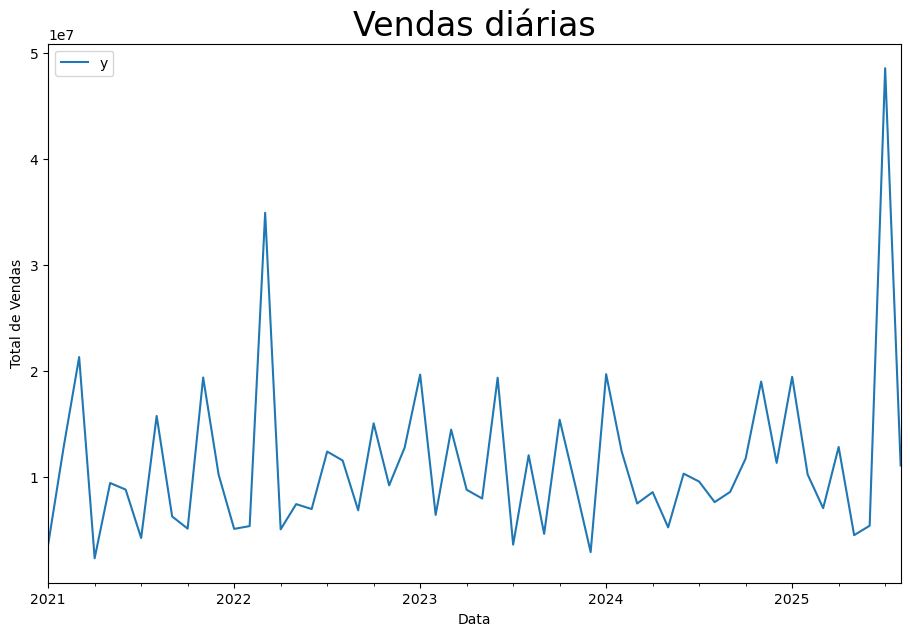

In [16]:
df_grouped.plot(figsize=(11, 7))
plt.plot(df_grouped)
plt.title('Vendas diárias', fontsize=24)
plt.ylabel('Total de Vendas')
plt.xlabel('Data')
plt.show()

In [17]:
print(df_grouped.index)  


DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01'],
     

In [18]:
df_grouped = df_grouped.asfreq("D")

In [19]:
print(df_grouped.isnull().sum())

y    1618
dtype: int64


In [20]:
df_grouped = df_grouped.interpolate()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(df_grouped, model='multiplicative', period=365)

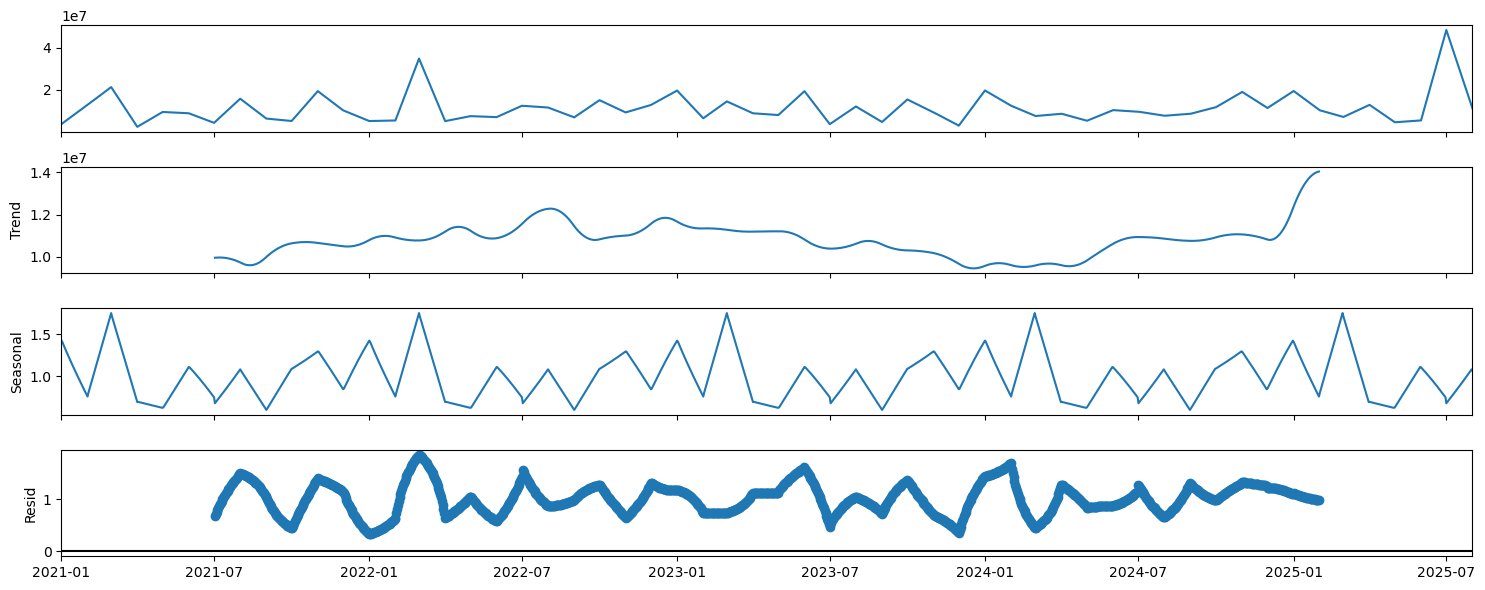

In [23]:
result.plot()


In [24]:
result2 = seasonal_decompose(df_grouped, model='aditive', period=365)
fig = result2.plot();
fig.set_size_inches(16,8)

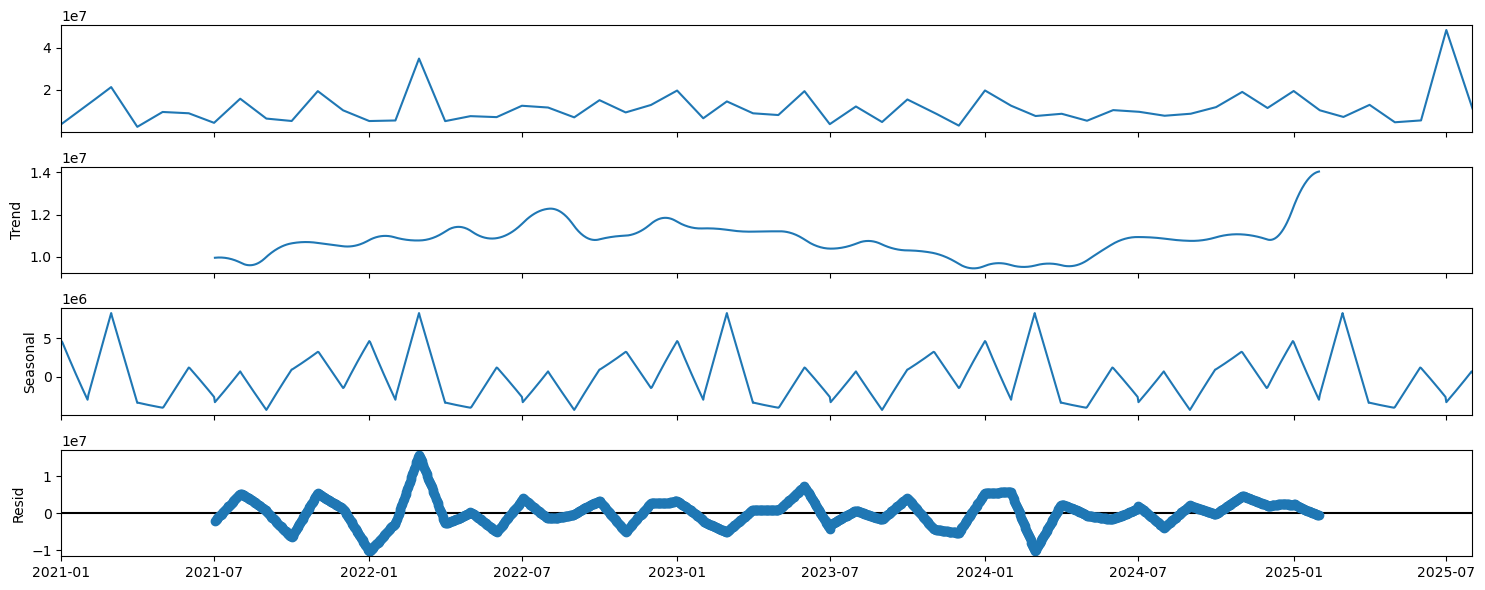

In [25]:
result2.plot()


In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [49]:
model = ExponentialSmoothing(
    df_grouped,
    seasonal_periods=12,
    trend='additive',
    seasonal='additive',
    use_boxcox=True  # <- aqui
)

In [59]:
model2 = ExponentialSmoothing(
    df_grouped,
    seasonal_periods=12,
    trend='multiplicative',
    seasonal='additive',
    use_boxcox=True  # <- aqui
)

In [62]:
fit1 = model.fit()

In [63]:
fit2 = model2.fit()

In [64]:
fit1.fittedvalues.plot(style='--', color='red', figsize=(14, 8))

<Axes: xlabel='ds'>

In [65]:
print(fit1.params)


{'smoothing_level': np.float64(0.9951583674501376), 'smoothing_trend': np.float64(0.639764915084032), 'smoothing_seasonal': np.float64(0.002420811032997087), 'damping_trend': nan, 'initial_level': np.float64(4.381212933127112), 'initial_trend': np.float64(-0.0028774451148741577), 'initial_seasons': array([-0.0009138 , -0.00085739, -0.00078954, -0.00076869, -0.00077531,
       -0.00076457, -0.00083307, -0.00084222, -0.00086625, -0.00085845,
       -0.00086951, -0.00091392]), 'use_boxcox': True, 'lamda': np.float64(-0.22013973341188164), 'remove_bias': False}


C:\Users\renet\AppData\Local\Temp\ipykernel_14924\3843594102.py:1: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(df_grouped, label='Original')


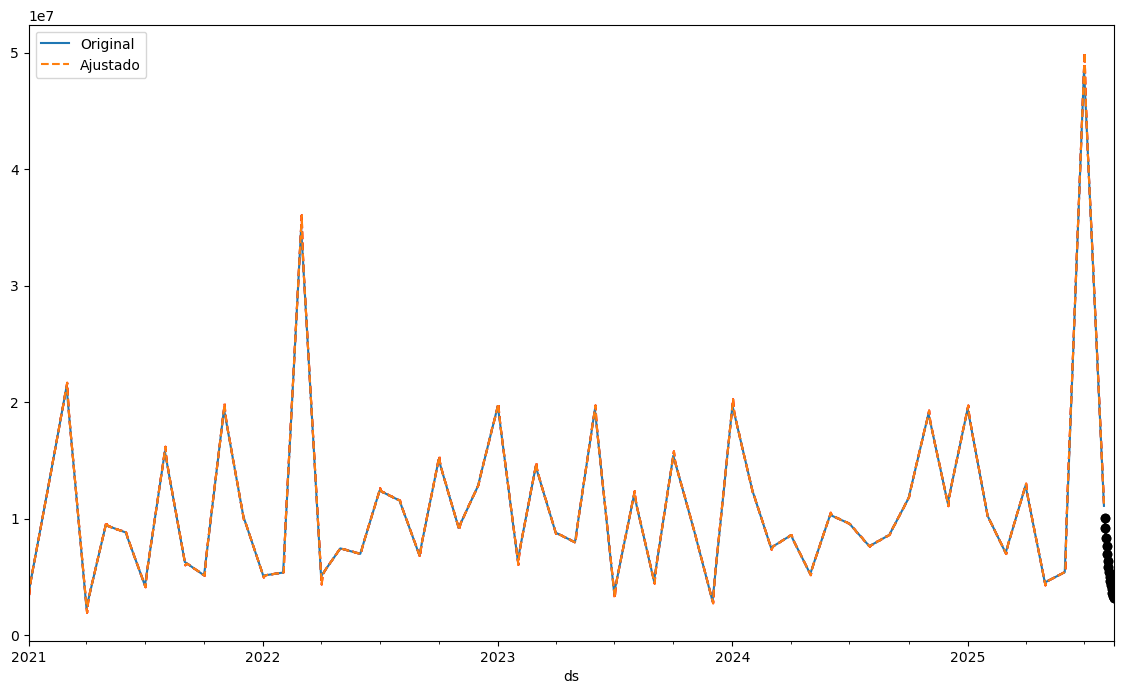

In [66]:
plt.plot(df_grouped, label='Original')
plt.plot(fit1.fittedvalues, label='Ajustado', linestyle='--')
plt.legend()
plt.show()

In [67]:
fit1.forecast(15).plot(style='--', marker='o', color='black', legend=True, figsize=(14, 8))

<Axes: >

In [68]:
fit1.fittedvalues.plot(style='--', color='red', figsize=(15, 9))
fit1.forecast(15).plot(style='--', marker='o', color='black', legend=True, figsize=(14, 8))

<Axes: xlabel='ds'>

In [69]:
fit2.forecast(15).plot(style='--', marker='o', color='blue', legend=True, figsize=(14, 8))

<Axes: xlabel='ds'>

In [70]:
fit1.fittedvalues.plot(style='--', color='red')
fit2.forecast(15).plot(style='--', marker='o', color='blue', legend=True, figsize=(14, 8))

<Axes: xlabel='ds'>

In [71]:
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(15).plot(style='--', marker='o', color='black', legend=True, figsize=(14, 8))
fit2.forecast(15).plot(style='--', marker='o', color='blue', legend=True, figsize=(14, 8))

<Axes: xlabel='ds'>